# Fixed Wave with Staggered Layout Scenario Example

In [1]:
%matplotlib inline

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [2]:
%run fixed_wave_staggered_layout_scenario.py

generate test data: d:\Users\108386\Desktop\notebooks\Meeting Edinburgh - renamed\fixed_wave_staggered_layout_scenario.pkl


In [3]:
from IPython.display import display, HTML

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [5]:
import numpy as np
from datetime import datetime

In [6]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu, ThemeMenu
from dtocean_core.pipeline import Tree, _get_connector
from dtocean_core.extensions import StrategyManager

In [7]:
# Bring up the logger
start_logging()

2016-09-12 10:51:34,513 - INFO - dtocean_core - Begin logging for dtocean_core.


In [8]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message
def html_variable(core, project, variable):
    value = variable.get_value(core, project)
    metadata = variable.get_metadata(core)
    name = metadata.title
    units = metadata.units
    message = "<b>{}:</b> {}".format(name, value)
    if units:
        message += " ({})".format(units[0])
    return message

## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [9]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
theme_menu = ThemeMenu()
data_menu = DataMenu()
pipe_tree = Tree()

## Create a new project and tree

In [10]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-09-12 10:51:38,553 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-09-12 10:51:38,553 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-09-12 10:51:38,553 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [11]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Wave Fixed")
my_var.read(new_core, new_project)

2016-09-12 10:51:38,584 - INFO - aneris.control.data - New "device.system_type" data stored with index NIV0KY
2016-09-12 10:51:38,584 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [12]:
project_menu.initiate_pipeline(new_core, new_project)

2016-09-12 10:51:38,604 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-09-12 10:51:38,614 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index EOFYJT
2016-09-12 10:51:38,614 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-09-12 10:51:38,614 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-09-12 10:51:38,614 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [13]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate some modules

Note that the order of activation is important and that we can't deactivate yet!

In [14]:
module_menu.activate(new_core, new_project, 'Hydrodynamics')
module_menu.activate(new_core, new_project, 'Electrical Sub Systems')
module_menu.activate(new_core, new_project, 'Mooring and Foundations')


## Activate the Economics and Reliability themes

In [15]:
names = theme_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

In [16]:
theme_menu.activate(new_core, new_project, "Economics")
theme_menu.activate(new_core, new_project, "Environmental Impact Assessment")

In [17]:
# Here we are expecting Hydrodynamics
assert _get_connector(new_project, "modules").get_current_interface_name(new_core, new_project) == "Hydrodynamics"

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [18]:
project_menu.initiate_dataflow(new_core, new_project)

2016-09-12 10:51:38,733 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index HTK7AI
2016-09-12 10:51:38,733 - INFO - aneris.control.simulation - Datastate stored
2016-09-12 10:51:38,753 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Create the branches assosiated to the modules

In [19]:
hydro_branch = pipe_tree.get_branch(new_core, new_project, "Hydrodynamics")
electro_branch = pipe_tree.get_branch(new_core, new_project, 'Electrical Sub Systems')
moorings_branch = pipe_tree.get_branch(new_core, new_project, 'Mooring and Foundations')
eco_branch = pipe_tree.get_branch(new_core, new_project, "Economics")
env_branch = pipe_tree.get_branch(new_core, new_project, "Environmental Impact Assessment")

## Load test data

In [20]:
hydro_branch.read_test_data(new_core,
                            new_project,
                            "fixed_wave_staggered_layout_scenario.pkl")

2016-09-12 10:51:38,894 - INFO - aneris.control.data - New "farm.wave_series" data stored with index R743IG
2016-09-12 10:51:38,894 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index XKSDEC
2016-09-12 10:51:38,904 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index PIVWRM
2016-09-12 10:51:38,904 - INFO - aneris.control.data - New "device.minimum_distance_x" data stored with index TDAQM7
2016-09-12 10:51:38,904 - INFO - aneris.control.data - New "device.minimum_distance_y" data stored with index XLDTTN
2016-09-12 10:51:38,904 - INFO - aneris.control.data - New "options.boundary_padding" data stored with index YDXGU7
2016-09-12 10:51:38,904 - INFO - aneris.control.data - New "device.installation_depth_min" data stored with index X3EB0Z
2016-09-12 10:51:38,904 - INFO - aneris.control.data - New "device.wave_data_directory" data stored with index EETIXL
2016-09-12 10:51:38,904 - INFO - aneris.control.data - New "site.l

In [21]:
electro_branch.read_test_data(new_core,
                              new_project,
                              "fixed_wave_staggered_layout_scenario.pkl")

2016-09-12 10:51:39,104 - INFO - aneris.control.data - New "device.constant_power_factor" data stored with index 4NEKDL
2016-09-12 10:51:39,104 - INFO - aneris.control.data - New "component.power_quality" data stored with index GV8H25
2016-09-12 10:51:39,104 - INFO - aneris.control.data - New "corridor.shipping_hist" data stored with index 1DQW09
2016-09-12 10:51:39,104 - INFO - aneris.control.data - New "component.switchgear" data stored with index 36YS8J
2016-09-12 10:51:39,104 - INFO - aneris.control.data - New "component.collection_points" data stored with index WCE5I9
2016-09-12 10:51:39,104 - INFO - aneris.control.data - New "component.dry_mate_connectors" data stored with index MQ70YZ
2016-09-12 10:51:39,114 - INFO - aneris.control.data - New "device.voltage" data stored with index IHOTPT
2016-09-12 10:51:39,114 - INFO - aneris.control.data - New "farm.shipping_hist" data stored with index 1DBQQI
2016-09-12 10:51:39,114 - INFO - aneris.control.data - New "corridor.max_seabed_tem

In [22]:
moorings_branch.read_test_data(new_core,
                               new_project,
                               "fixed_wave_staggered_layout_scenario.pkl")

2016-09-12 10:51:39,374 - INFO - aneris.control.data - New "farm.mean_wind_speed_100_year" data stored with index SOR0HK
2016-09-12 10:51:39,374 - INFO - aneris.control.data - New "device.system_profile" data stored with index 8OIDLT
2016-09-12 10:51:39,374 - INFO - aneris.control.data - New "farm.wave_gamma_100_year" data stored with index Q5XBMY
2016-09-12 10:51:39,374 - INFO - aneris.control.data - New "constants.gravity" data stored with index CZ23JH
2016-09-12 10:51:39,384 - INFO - aneris.control.data - New "constants.cylinder_drag" data stored with index 31HCXZ
2016-09-12 10:51:39,384 - INFO - aneris.control.data - New "device.dry_beam_area" data stored with index S3RPTA
2016-09-12 10:51:39,384 - INFO - aneris.control.data - New "device.wet_beam_area" data stored with index 4X62AB
2016-09-12 10:51:39,384 - INFO - aneris.control.data - New "farm.max_water_level_50_year" data stored with index R6G2FC
2016-09-12 10:51:39,384 - INFO - aneris.control.data - New "device.wet_frontal_are

In [23]:
env_branch.read_test_data(new_core,
                               new_project,
                               "fixed_wave_staggered_layout_scenario.pkl")

2016-09-12 10:51:39,624 - INFO - aneris.control.data - New "farm.hydro_measured_turbidity" data stored with index MRD5VF
2016-09-12 10:51:39,624 - INFO - aneris.control.data - New "farm.elec_measured_magnetic_field" data stored with index NNUCZ0
2016-09-12 10:51:39,624 - INFO - aneris.control.data - New "farm.elec_measured_noise" data stored with index YJ5X8N
2016-09-12 10:51:39,624 - INFO - aneris.control.data - New "farm.initial_magnetic_field" data stored with index PEYERP
2016-09-12 10:51:39,624 - INFO - aneris.control.data - New "farm.hydro_reserve_effect_weight" data stored with index RMSETU
2016-09-12 10:51:39,624 - INFO - aneris.control.data - New "farm.hydro_measured_noise" data stored with index ETWQVL
2016-09-12 10:51:39,624 - INFO - aneris.control.data - New "farm.moor_measured_noise" data stored with index O9708F
2016-09-12 10:51:39,634 - INFO - aneris.control.data - New "farm.protected_table" data stored with index VARX1Z
2016-09-12 10:51:39,634 - INFO - aneris.control.da

## Check the status of the inputs

* satisfied - data is in the data state
* required - data is not in the data state
* unavailable - data will come from another source

In [24]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [25]:
input_status = electro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [26]:
input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Economics Theme

In [27]:
theme_name = "Economics"
input_status = eco_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Environmental Theme

In [28]:
theme_name = "Environmental Impact Assessment"
input_status = env_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Set the discount rate, device cost and project lifetime

In [29]:
discount_rate = 0.05
device_cost = 1000000

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "project.discount_rate")
new_var.set_raw_interface(new_core, discount_rate)
new_var.read(new_core, new_project)

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "device.system_cost")
new_var.set_raw_interface(new_core, device_cost)
new_var.read(new_core, new_project)

2016-09-12 10:51:39,743 - INFO - aneris.control.data - New "project.discount_rate" data stored with index O1GI6U
2016-09-12 10:51:39,743 - INFO - aneris.control.simulation - Datastate stored
2016-09-12 10:51:39,763 - INFO - aneris.control.data - New "device.system_cost" data stored with index DW6GX1
2016-09-12 10:51:39,763 - INFO - aneris.control.simulation - Datastate stored


## Check if the modules can be executed

In [30]:
can_execute = module_menu.is_executable(new_core, new_project, 'Hydrodynamics')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Electrical Sub Systems')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Mooring and Foundations')
display(can_execute)

input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)

input_status = eco_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

input_status = env_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

True

False

False

## See what execution strategies are available

First the strategy manager in required to collect the strategy plugins.

In [31]:
strategy_manager = StrategyManager()

In [32]:
strategy_list = strategy_manager.get_available_strategies()
message = html_list(strategy_list)
HTML(message)

## Execute the Basic strategy

The "basic" strategy simply exectutes the chosen modules in sequence 

In [33]:
basic_strategy = strategy_manager.get_strategy("Basic")
basic_strategy.execute(new_core, new_project)

2016-09-12 10:51:39,844 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
No NOGO areas related to the machine depthinstallation constraints have been found.
2016-09-12 10:51:40,053 - WARNING - dtocean_hydro.input - [Warning] The wave module cannot run with variable bathymetry
The bathymetry is reduced to its average value.
2016-09-12 10:51:40,053 - INFO - dtocean_hydro.input - The averge bathymetry value is -80.0 m
2016-09-12 10:51:40,793 - INFO - dtocean_hydro.input - --> MACHINE INPUT SUMMARY:

{   'Clen': None,
    'Floatflag': False,
    'InstalDepth': (-inf, 0.0),
    'MaxNumDevices': 5,
    'MinDist': (200.0, 200.0),
    'OptThreshold': 0.9,
    'RatedPowerArray': 1.5,
    'RatedPowerDevice': 0.3,
    'Type': 'Wave',
    'UserArray': {   'Option': 1, 'Value': 'staggered'},
    'UserOutputTable': None,
    'YawAngle': 360.0,
    'lCS': array([ 0.,  0.,  0.]),
    'tidalFlag': False,
    'tidal_bidirectional': None,
    'tidal_cutinout': None,


C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:6580: ComplexWarning: Casting complex values to real discards the imaginary part
  self.totfoundslopeloads[j][i])
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:8590: ComplexWarning: Casting complex values to real discards the imaginary part
  < math.fabs(vertdesload[j])):
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:8597: ComplexWarning: Casting complex values to real discards the imaginary part
  < math.fabs(vertdesload[j])):
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:8753: ComplexWarning: Casting complex values to real discards the imaginary part
  vertdesload[j])


2016-09-12 11:41:54,150 - INFO - dtocean_moorings.core - 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Gravity foundation/anchor design
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
2016-09-12 11:41:54,150 - INFO - dtocean_moorings.core - 
Solution found [6.0, 6.0, 1.5, 0.0, 0.0, [0, 0], [0, 0], (2.5780640941382416+105.4417078659614j), (51.421935905861758-105.4417078659614j)]
2016-09-12 11:41:54,150 - INFO - dtocean_moorings.core - 
_______________________________________________________________________
Foundation 1
_______________________________________________________________________
2016-09-12 11:41:54,150 - INFO - dtocean_moorings.core - 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Pile foundation/anchor design
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:7230: ComplexWarning: Casting complex values to real discards the imaginary part
  self.maxloadindex[j]]))
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:7607: ComplexWarning: Casting complex values to real discards the imaginary part
  / effbasewidth) * (bcfnq / bcfnc))
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:7611: ComplexWarning: Casting complex values to real discards the imaginary part
  * math.tan(self.dsfangrad))
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:7722: ComplexWarning: Casting complex values to real discards the imaginary part
  / transdepth[self.maxloadindex[j]]))
C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:7727: ComplexW

2016-09-12 11:41:55,069 - INFO - dtocean_moorings.core - 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Gravity foundation/anchor design
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
2016-09-12 11:41:55,079 - INFO - dtocean_moorings.core - 
Solution found [6.25, 6.25, 1.5625, 0.0, 0.0, [0, 0], [0, 0], (4.8487524729199833-61.475272202512052j), (56.186403777080017+61.475272202512052j)]
2016-09-12 11:41:55,079 - INFO - dtocean_moorings.core - 
_______________________________________________________________________
Foundation 2
_______________________________________________________________________
2016-09-12 11:41:55,079 - INFO - dtocean_moorings.core - 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Pile foundation/anchor design
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
2016-09-12 11:41:55,990 - INFO - dtocean_moorings.core - 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Shallow foundation/anchor design
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
2016-09-12 11:41:56,000

C:\Anaconda\envs\dtocean\lib\site-packages\dtocean_moorings-0.2.0.dev0-py2.7.egg\dtocean_moorings\core.py:7219: ComplexWarning: Casting complex values to real discards the imaginary part
  - trapsoilweight)


2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-12 11:41:56,720 - WARNING - dtocean_moorings.core - WARNING: Reynolds number out of range for drag coefficient data
2016-09-

## Examine the Hydrodynamics results

Currently, there is no robustness built into the core, so the assumption is that the modules executed successfully. This will have to be improved towards deployment of the final software.

Lets see what outputs are available from the Hydrodynamics module.

In [34]:
hydro_branch.inspect(new_core, new_project)

In [35]:
output_status = hydro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [36]:
n_devices = hydro_branch.get_output_variable(new_core, new_project, "farm.number_of_devices")
meta_data = n_devices.get_metadata(new_core)
name = meta_data.title
value = n_devices.get_value(new_core, new_project)
message_one = "<p><b>{}:</b> {}</p>".format(name, value)

farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

farm_device_power = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_per_device")
meta_data = farm_device_power.get_metadata(new_core)
name = meta_data.title
value = farm_device_power.get_value(new_core, new_project)
units = meta_data.units[0]
message_three = "<p><b>{}</b> ({}):{}</p>".format(name, units, html_dict(value))

HTML(message_one + message_two + message_three)

In [37]:
layout = hydro_branch.get_output_variable(new_core, new_project, "farm.layout")
layout.get_value(new_core, new_project)

{'Device001': <shapely.geometry.point.Point at 0x16829128>,
 'Device002': <shapely.geometry.point.Point at 0x16829898>}

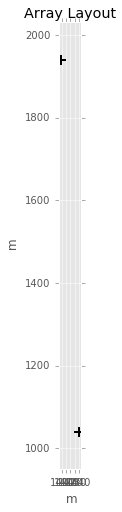

In [38]:
layout.plot(new_core, new_project)

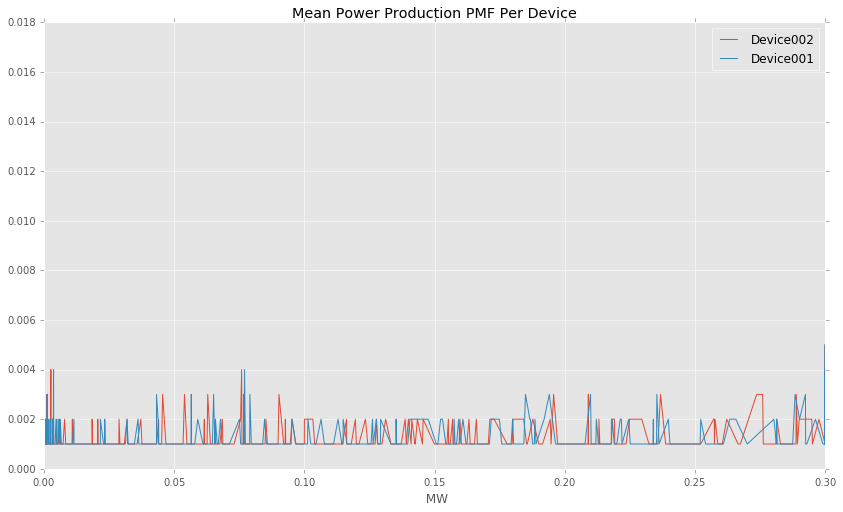

In [39]:
power_pmf = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_pmf_per_device")
power_pmf.plot(new_core, new_project)
power_pmf_value = power_pmf.get_value(new_core, new_project)

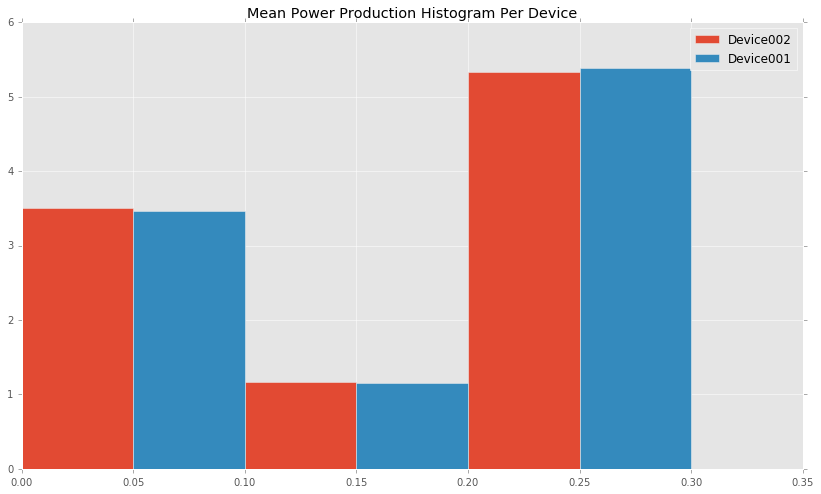

In [40]:
power_hist = electro_branch.get_input_variable(new_core, new_project, "farm.mean_power_hist_per_device")
power_hist.plot(new_core, new_project)

## Examine the Electrical Sub-systems results

Lets see what outputs are available from the modules.

In [41]:
electro_branch.inspect(new_core, new_project)

In [42]:
output_status = electro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [43]:
farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_two)

In [44]:
electrical_cost = electro_branch.get_output_variable(new_core, new_project,
                                                     "farm.electrical_economics_data")
                                            
cost_data = electrical_cost.get_value(new_core, new_project)

In [45]:
cost_data

,Cost,Key Identifier,Quantity,Year
0,600.0,1.0,940.0,0
1,700.0,2.0,1440.0,0
2,150000.0,11.0,1.0,0
3,150000.0,5.0,2.0,0
4,1000000.0,NaN,1.0,0


In [46]:
substations = electro_branch.get_output_variable(new_core, new_project,
                                                 "farm.substation_layout")
if substations.has_value(new_core, new_project): substations.get_value(new_core, new_project)

## Examine the Mooring and Foundations results

Lets see what outputs are available from the modules.

In [47]:
moorings_branch.inspect(new_core, new_project)

In [48]:
output_status = moorings_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

## Examine Economics Results

In [49]:
output_status = eco_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [50]:
lcoe = eco_branch.get_output_variable(new_core, new_project, "project.lcoe")
lcoe_capex = eco_branch.get_output_variable(new_core, new_project, "project.capex_lcoe")
total_cost = eco_branch.get_output_variable(new_core, new_project, "project.capex_total")
discount_energy = eco_branch.get_output_variable(new_core, new_project, "project.discounted_energy")
cost_breakdown = eco_branch.get_output_variable(new_core, new_project, "project.capex_breakdown")

In [51]:
message_lcoe = html_variable(new_core, new_project, lcoe)
message_cost = html_variable(new_core, new_project, total_cost)
message_energy = html_variable(new_core, new_project, discount_energy)
message = "<p>{}</p><p>{}</p><p>{}</p>".format(message_lcoe, message_cost, message_energy)
HTML(message)

## Plot the balance of CAPEX costs

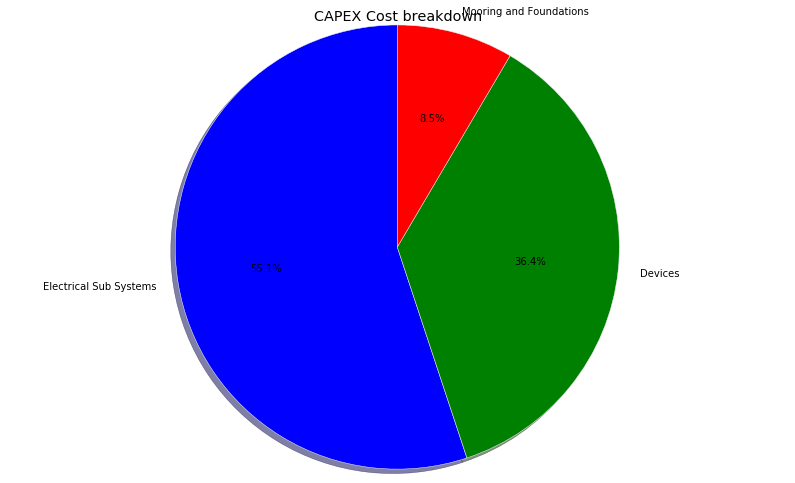

In [52]:
# The slices will be ordered and plotted counter-clockwise.
cost_data = cost_breakdown.get_value(new_core, new_project)
labels = cost_data.keys()
sizes = cost_data.values()
metadata = cost_breakdown.get_metadata(new_core)
colors = ['lightblue', 'hotpink']

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title(metadata.title)

plt.show()

# HTML in matplotlib?

In [53]:
msg = html_dict(cost_data)
HTML(msg)

## Examine Economics Results

In [54]:
output_status = env_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [55]:
hydro_season = env_branch.get_output_variable(new_core, new_project, "farm.hydro_season")
hydro_season.get_value(new_core,new_project)

,January,February,March,April,May,June,July,August,September,October,November,December
Resting Place,10.000518,10.000518,10.000518,10.000518,10.000518,10.000518,10.000518,10.000518,10.000518,10.000518,10.000518,10.000518
Collision Risk,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896,-76.121896
Turbidity,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000,-74.000000
Reserve Effect,10.000288,10.000288,10.000288,10.000288,10.000288,10.000288,10.000288,10.000288,10.000288,10.000288,10.000288,10.000288
Reef Effect,10.026266,10.026266,10.026266,10.026266,10.026266,10.026266,10.026266,10.026266,10.026266,10.026266,10.026266,10.026266


In [56]:
elec_confidence = env_branch.get_output_variable(new_core, new_project, "farm.elec_confidence")
elec_confidence.get_value(new_core,new_project)

{'Collision Risk': 3,
 'Electric Fields': 2,
 'Footprint': 2,
 'Magnetic Fields': 2,
 'Reef Effect': 3,
 'Reserve Effect': 3,
 'Resting Place': 3,
 'Temperature Modification': 2,
 'Underwater Noise': 2}